### Librerías

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataset "Iris"

In [108]:
iris=sns.load_dataset("iris")

### Introducción a los datos

El dataset de iris contiene mediciones de las dimensiones de los sépalos y pétalos de las flores de iris, así como la especie a la que pertenece cada flor.     
Cada fila representa una flor de iris y cada columna representa una característica específica de esa flor.

1. **sepal_length**: Longitud del sépalo de la flor de iris en centímetros.
2. **sepal_width**: Ancho del sépalo de la flor de iris en centímetros.
3. **petal_length**: Longitud del pétalo de la flor de iris en centímetros.
4. **petal_width**: Ancho del pétalo de la flor de iris en centímetros.
5. **species**: Especie de la flor de iris. Hay tres especies en el dataset: "setosa", "versicolor" y "virginica". Esta columna es la variable objetivo que se utiliza para clasificar las flores en diferentes especies.

### Exploratory Data Analysis

#### Visualización de las primeras líneas

In [109]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Visualización de las columnas

In [110]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Visualización del tipo y número de variables

In [111]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Visualización de la variable objetivo/target/respuesta (en este caso, la única que es objeto: "species)

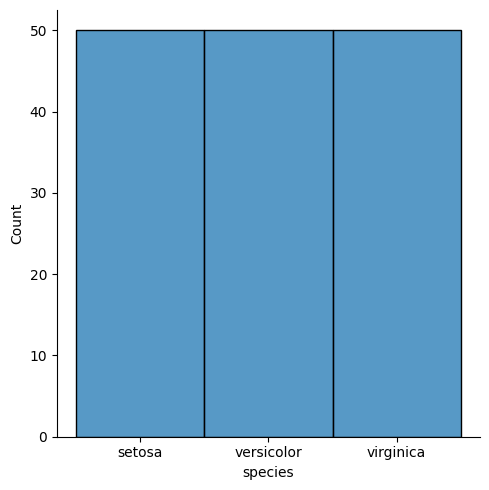

In [113]:
sns.displot(iris["species"])

#### Codificación de la variable "species"

In [114]:
list(set(iris["species"]))

['setosa', 'virginica', 'versicolor']

In [115]:
iris["species"] = iris["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2})

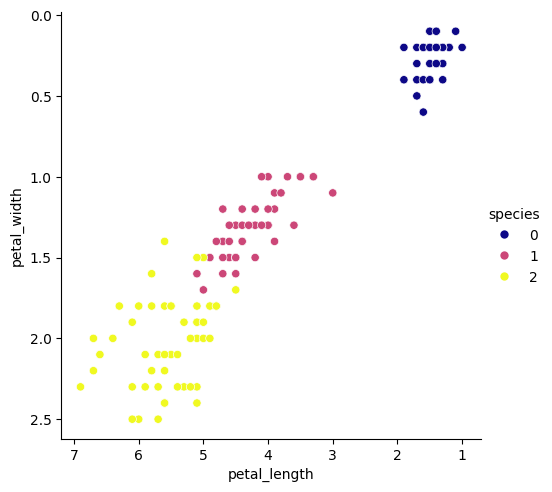

In [126]:
g = sns.relplot(iris, x = "petal_length", y = "petal_width", hue = "species", palette="plasma")
g.figure.axes[0].invert_yaxis()
g.figure.axes[0].invert_xaxis()
plt.show()

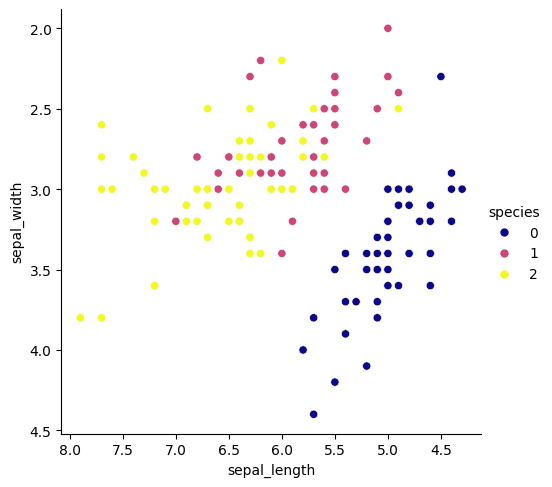

In [127]:
g = sns.relplot(iris, x = "sepal_length", y = "sepal_width", hue = "species", palette="plasma")
g.figure.axes[0].invert_yaxis()
g.figure.axes[0].invert_xaxis()
plt.show()

#### Visualización de la correlación de los datos numéricos en un mapa de calor

In [118]:
variables_numericas=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

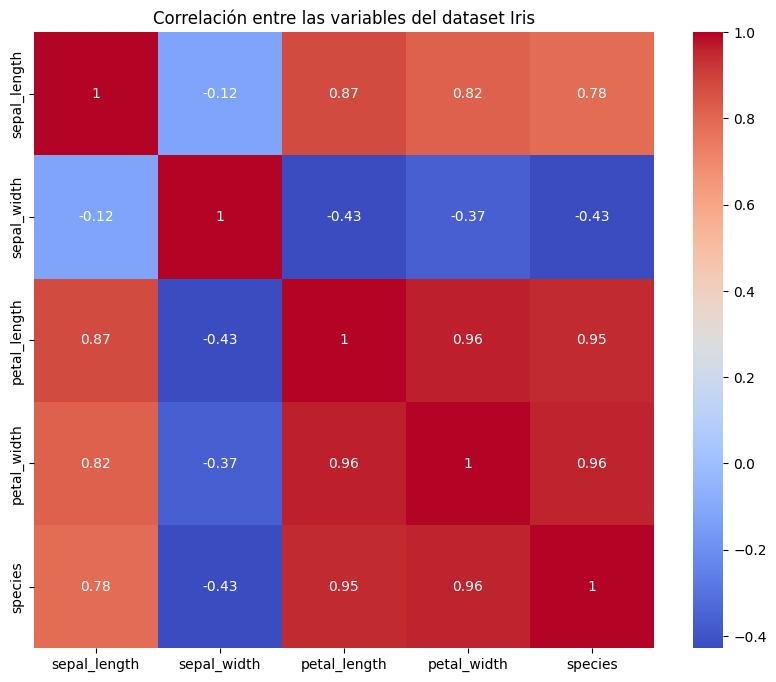

In [119]:
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(iris.corr(), annot=True, cmap="coolwarm")
heatmap.set_title("Correlación entre las variables del dataset Iris")
plt.show()



Notas: 
- Longitud y ancho del pétalo son variables estrechamente relacionadas entre sí.
- Longitud y ancho del sépalo **no** están relacionados entre sí.
-----------------------
- La longitud y el ancho del pétalo están relacionados con la longitud del sépalo.
- La longitud y el ancho del pétalo, **no** están relacionados con el ancho del sépalo.
-----------------------
- Las especies están condidionadas principalmente por la longitud y el ancho de los pétalos y, en menor medida, por la longitud del sépalo. El ancho del sépalo no parece ser condicionante para definir la especie.

#### Correlación con distintos métodos

In [120]:
iris.corr(method = "pearson", numeric_only=True).sort_values(by = "species", axis = 0).sort_values(by = "species", axis = 1)

,sepal_width,sepal_length,petal_length,petal_width,species
sepal_width,1.000000,-0.117570,-0.428440,-0.366126,-0.426658
sepal_length,-0.117570,1.000000,0.871754,0.817941,0.782561
petal_length,-0.428440,0.871754,1.000000,0.962865,0.949035
petal_width,-0.366126,0.817941,0.962865,1.000000,0.956547
species,-0.426658,0.782561,0.949035,0.956547,1.000000


In [121]:
iris.corr(method = "spearman", numeric_only=True).sort_values(by = "species", axis = 0).sort_values(by = "species", axis = 1)

,sepal_width,sepal_length,petal_length,petal_width,species
sepal_width,1.000000,-0.166778,-0.309635,-0.289032,-0.440290
sepal_length,-0.166778,1.000000,0.881898,0.834289,0.798078
petal_length,-0.309635,0.881898,1.000000,0.937667,0.935431
petal_width,-0.289032,0.834289,0.937667,1.000000,0.938179
species,-0.440290,0.798078,0.935431,0.938179,1.000000


In [122]:
iris.corr(method = "kendall", numeric_only=True).sort_values(by = "species", axis = 0).sort_values(by = "species", axis = 1)

,sepal_width,sepal_length,petal_length,petal_width,species
sepal_width,1.000000,-0.076997,-0.185994,-0.157126,-0.337614
sepal_length,-0.076997,1.000000,0.718516,0.655309,0.670444
petal_length,-0.185994,0.718516,1.000000,0.806891,0.822911
petal_width,-0.157126,0.655309,0.806891,1.000000,0.839687
species,-0.337614,0.670444,0.822911,0.839687,1.000000


#### Relación entre las especies y el ancho de los pétalos

<Axes: xlabel='species', ylabel='petal_width'>

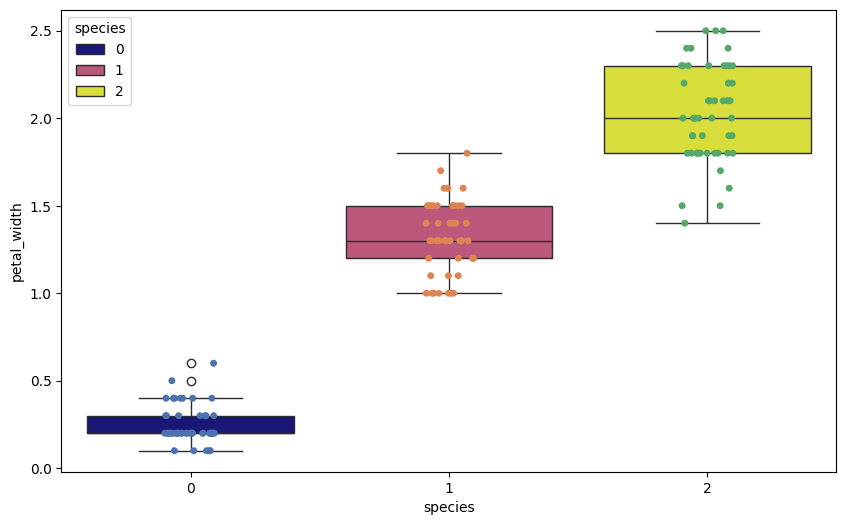

In [123]:
plt.figure(figsize=(10,6))
sns.boxplot(iris, x="species", y="petal_width", hue="species", palette="plasma", dodge="auto")
sns.stripplot(iris, x="species", y="petal_width", hue="species", palette="deep", legend=False)

In [124]:
from scipy import stats
skewed_feats=iris.loc[:,variables_numericas].apply(lambda x:stats.skew(x.dropna())).sort_values(ascending=False)
skewness= pd.DataFrame({"Skew":skewed_feats})
print(skewed_feats.head())

sepal_width     0.315767
sepal_length    0.311753
petal_width    -0.101934
petal_length   -0.272128
dtype: float64


Nota: no necesitan cambios

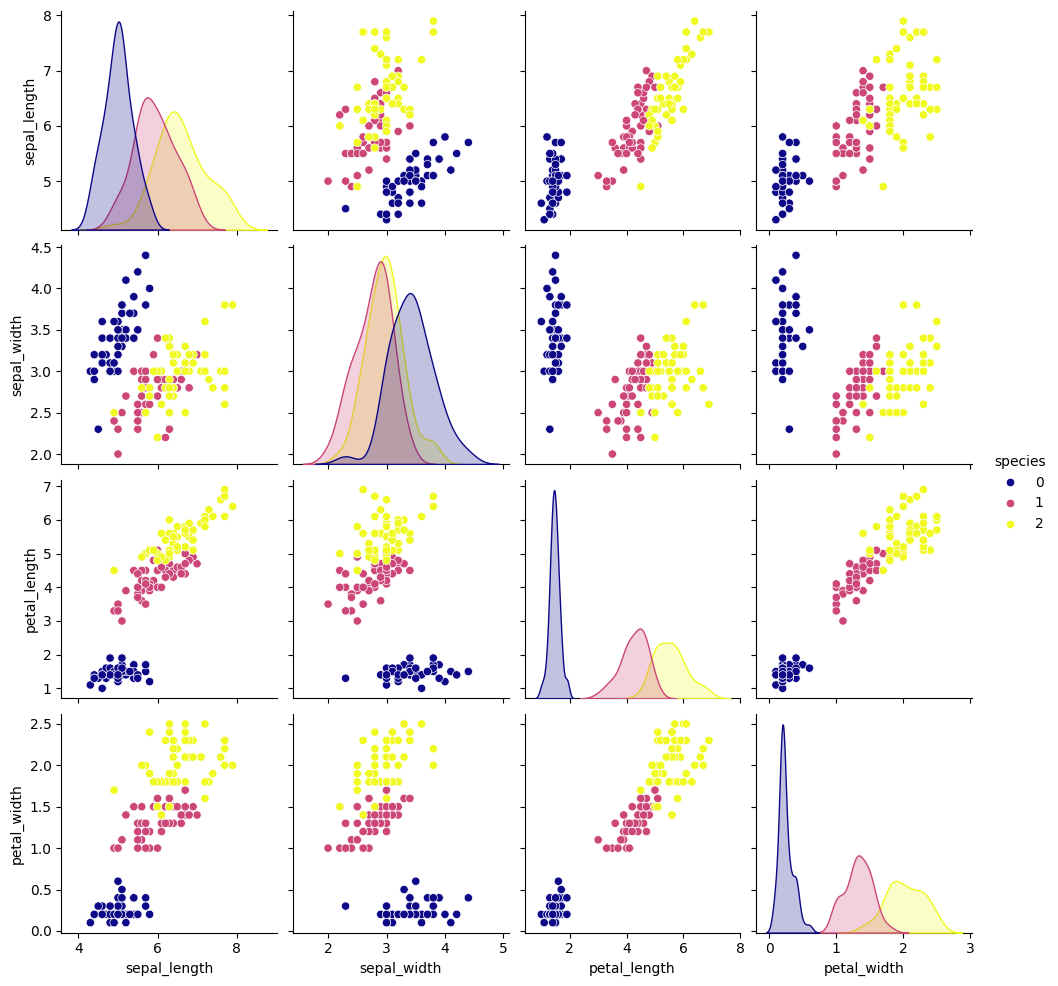

In [125]:
pair_plot=sns.pairplot(iris, diag_kind="kde", hue="species", palette="plasma")
pair_plot.fig.title=("Iris Pairplot")

Nota para ampliación: podemos ampliar añadiendo columnas del area del pétalo y del sépalo y luego sacando gráficos relevantes cpon esas columnas